# Lezione 5

In questa lezione verrà caclolata la distanza media tra elettrone e protone in un atomo di idrogeno per un elettrone nel ground state $1s$ e un elettrone nello stato eccitato $2p$. 

L'equazione di Schrodinger per l'atomo di idrogeno è risolubile analiticamente e conosciamo le funzioni d'onda $\psi _{100}$ e $\psi _{210}$ degli stati $1s$ e $2p$.
Quindi, usando come unità naturali $a_0=1$, possiamo calcolare:

$$
    <r>_{1s} = \int r|\psi _{100} (r,\theta,\phi)|^2drd\theta d\phi = 3/2 \label{r1}
$$   
$$
    <r>_{2s} = \int r|\psi _{210} (r,\theta,\phi)|^2drd\theta d\phi = 5 \label{r2}
$$
dove
$$
    |\psi _{100} (r,\theta,\phi)|^2 = \frac{e^{-2r}}{\pi} 
$$ 
$$
    |\psi _{210} (r,\theta,\phi)|^2 = \frac{1}{32\pi}r^2e^{-r}\cos ^2(\theta).
$$

Di seguito useremo il metodo Monte Carlo per calcolare gli integrali $<r>_{1s}$ e $<r>_{2s}$  campionando le densità di probabilità $|\psi _{100}|^2$ e $|\psi _{210}|^2$ con l'algoritmo Metropolis.  


Per campionare una densità $\rho (\mathbf{x})$ con l'algoritmo Metropolis viene scelto un punto iniziale  $\mathbf{x}_0 = (x_0,y_0,z_0)$ e si genera una catena di Markov nel modo seguente:
dato il punto $\mathbf{x}_i$ si costruisce il punto successivo $\mathbf{x}_{i+1}$ come in un random walk nel continuo con passo $\delta$; se il nuovo punto si trova in una posizione più porbabile della precedente si accetta altrimenti viene accettato con probabilità $\rho (\mathbf{x}_{i+1})/\rho (\mathbf{x}_i)$. 
Questo algoritmo produce un campione della densità $\rho (\mathbf{x})$. 


Il paramentro $\delta$ dell'algoritmo viene fissato in modo che che il Metropolis accetti i punti proposti circa il $50\%$ delle volte. Nel caso di $|\psi _{100}|^2$ ho trovato $\delta = 1$
e per $|\psi _{210}|^2$ $\delta = 2.5$.


## Tempo di equilibrazione

Una volta fissato $\delta$ troviamo il tempo di equilibrazione ovvero il numero di time step necessari perché i punti della catena di Markov comincino ad essere rappresentativi della distribuzione che vogliamo campionare. 
Il tempo di equilibrazione dipende dal punto iniziale della catena di Markov. Se questo cade in una regione di alta probabilità il transiente prima di ottenere un buon campionamento sarà molto breve; se il punto iniziale cade in una zona poco probabile sarà necessario un maggior numero di time step prima che i punti generati cadano in una regione di alta probabilità. 

Questo fatto è illustrato nelle figure seguenti, relative alla densità $|\psi _{100}|^2$, le quali mostrano l'andamento di $r=|\mathbf{x}|$ dei punti della catena di Markov in funzione del numero di time step.
Nella prima figura è stato usato il punto iniziale $\mathbf{x}_0=(0,0,0)$, punto di massimo di $|\psi _{100}|^2$, mentre nella seconda $\mathbf{x}_0'=(10,10,10)$, punto di bassa probabilità.

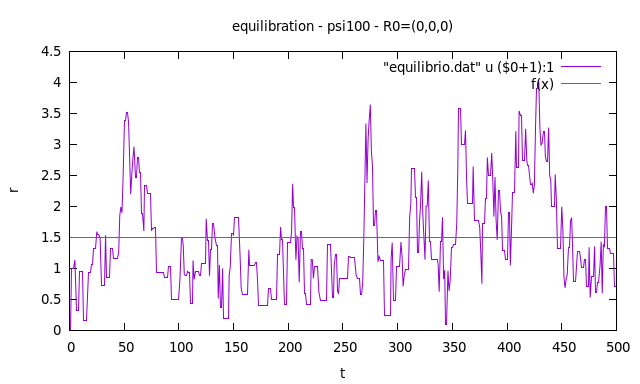

In [1]:
from IPython.display import Image
i = Image(filename = 'equilibration_100_R0.png') #immagine ottenuta con gnuplot
i

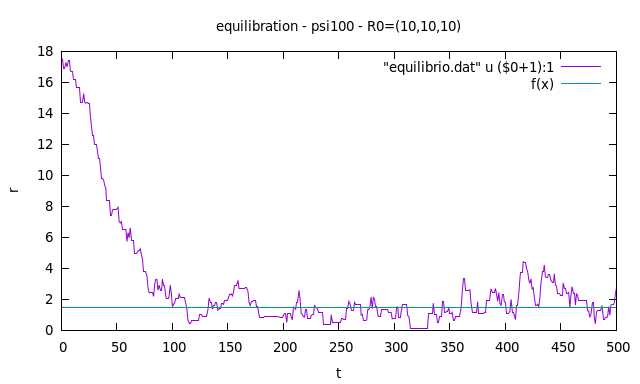

In [2]:
from IPython.display import Image
i = Image(filename = 'equilibration_100_Rfar.png') #immagine ottenuta con gnuplot
i

Nella prima figura vediamo che dopo circa 50 time step gli $r$ campionati oscillano attorno a un valore costante, mentre nella seconda bisogna aspettare un transiente di circa 100 time step prima che ciò accada
(In azzurro ho rappresentato la media teorica $<r>_{1s}$).
In virtù di queste osservazioni nella successiva simulazione Monte Carlo per $<r>_{1s}$ ho utilizzato come punto iniziale $\mathbf{x}_0=(0,0,0)$ e ho fissato un tempo di equilibrazione di 50 time step.  


Ho ripetuto simulazioni analoghe per $|\psi _{210}|^2$ sceglindo i punti iniziali $\mathbf{x}_0=(0,0,0)$ e $\mathbf{x}_0'=(0,0,2)$ dove $\mathbf{x}_0$ è un punto di probabilità nulla e punto di simmetria della densità mentre $\mathbf{x}_0'$ è un punto di massima probabilità ma in posizione asimmetrica.
Nel determinare il tempo di equilibrazione associato a questi punti iniziali ho considerato sia l'andamento di $r$ che quello della coordinata $z$.
Ciò perché anche quando $r$ si fosse stabilizzato attorno a un valore costante, non si può dire di aver ottenuto un campionamento fedele della densità (di aver raggiunto equilibrazione) finché non siano state visitate entrambe le regioni associate ai lobi di $|\psi _{210}|^2$, ovvero finché $z$ non abbia cambiato segno almeno una volta. 
Nelle figure seguenti troviamo gli andamenti di $r$ e $z$ per $\mathbf{x}_0=(0,0,0)$: 

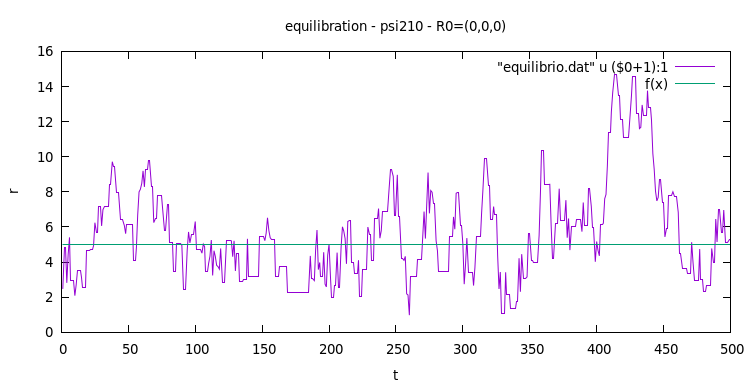

In [3]:
from IPython.display import Image
i = Image(filename = 'equilibration_210_R0.png') #immagine ottenuta con gnuplot
i

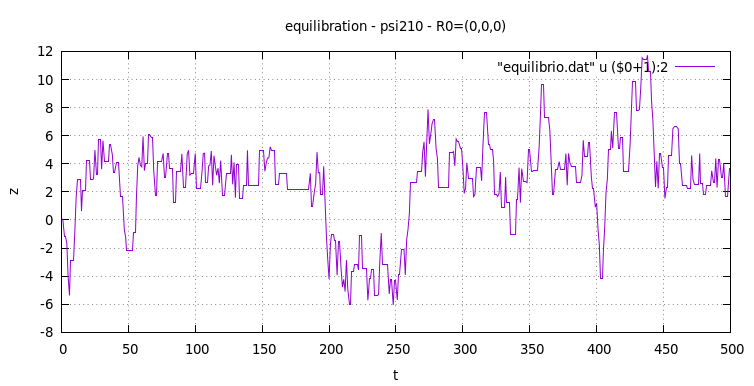

In [4]:
from IPython.display import Image
i = Image(filename = 'equilibration_z_R0.png') #immagine ottenuta con gnuplot
i

e ora gli andamenti per $\mathbf{x}_0'=(0,0,2)$:

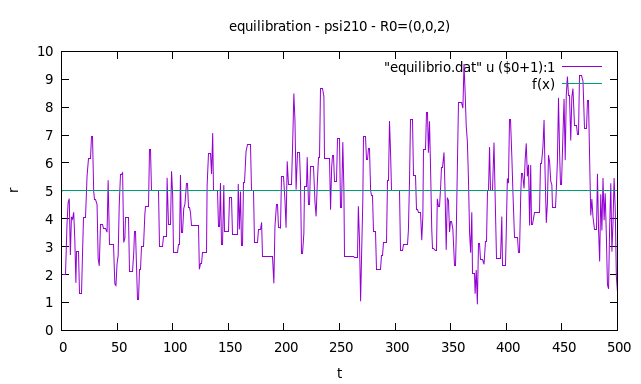

In [5]:
from IPython.display import Image
i = Image(filename = 'equilibration_210_Rlobo.png') #immagine ottenuta con gnuplot
i

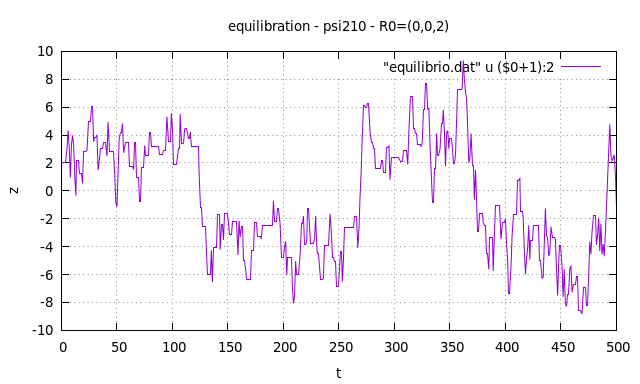

In [6]:
from IPython.display import Image
i = Image(filename = 'equilibration_z_Rlobo.png') #immagine ottenuta con gnuplot
i

Nel caso di $\mathbf{x}_0=(0,0,0)$ osserviamo che 50 time step può essere un buon tempo di equilibrazione mentre per $\mathbf{x}_0'=(0,0,2)$ è più cauto considerare un tempo intorno ai 150 time step. 
Nella successiva simulazione Monte Carlo per $<r>_{2p}$ ho utilizzato come punto iniziale $\mathbf{x}_0=(0,0,0)$ e ho fissato un tempo di equilibrazione di 50 time step.

## Lunghezza di correlazione

Prima di procedere con le simulazioni Monte Carlo dobbiamo stabilire la dimensione dei blocchi per il Datablock.
L'obiettivo del datablock è quello di ottenere un nuovo campione, quello delle medie dei blocchi, i cui valori siano scorrelati così da poter calcolare media e incertezza finali utilizzando il TLC. 

Una catena di Markov produce correlazioni poichè ogni punto viene generato a partire dalla posizione del punto precedente. Di conseguenza per scegliere la dimensione dei blocchi dobbiamo determinare la lunghezza di correlazione della catena di Markov. 
Per trovare la lunghezza di correlazione generiamo un campione di traiettorie del processo di Markov e calcoliamo la media $<\mathbf{x}_t\cdot\mathbf{x}_{t+\tau}>_{\text{traj}}$ e la fittiamo con un esponenziale $ae^{-\tau/l}+b$. Il parametro $l$ rappresenta il tempo caratteristico con cui cadono le correlazioni.
Nelle figure seguenti sono mostrati gli andamenti di $<\mathbf{x}_t\cdot\mathbf{x}_{t+\tau}>$ per le distribuzioni $|\psi _{100}|^2$ e $|\psi _{1210}|^2$: 

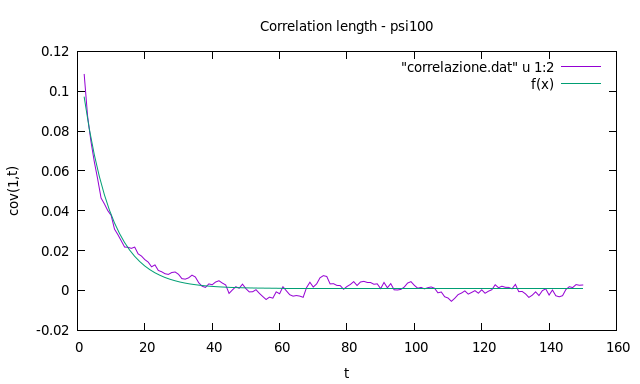

In [7]:
from IPython.display import Image
i = Image(filename = 'correlation_100.png') #immagine ottenuta con gnuplot
i

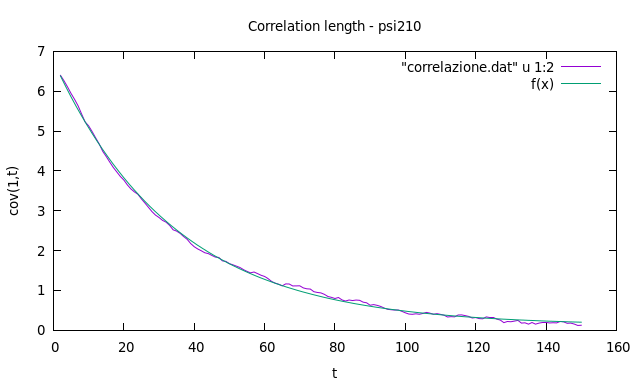

In [8]:
from IPython.display import Image
i = Image(filename = 'correlation_210.png') #immagine ottenuta con gnuplot
i

Nel primo caso otteniamo $l = 8.4 \pm  0.3$ mentre nel secondo $l = 34.4 \pm 0.3$.
Fissiamo una dimensione dei blocchi che sia almeno 5 volte la lunghezza di correlazione: 200 time step si addice a entrambi i casi.


## Simulazione Monte Carlo

Avendo stabilito tutti i paramentri della simulazione procediamo a calcolare le stime Monte Carlo degli integrali $<r>_{1s}$ e $<r>_{2s}$. Per entrambe le densità viene generato un campione di $10^5$ elementi diviso in 500 blocchi. 
Nelle figure seguenti è mostrato l'andamento delle stime di $<r>_{1s}$ e $<r>_{2s}$ con la dimensione del campione:

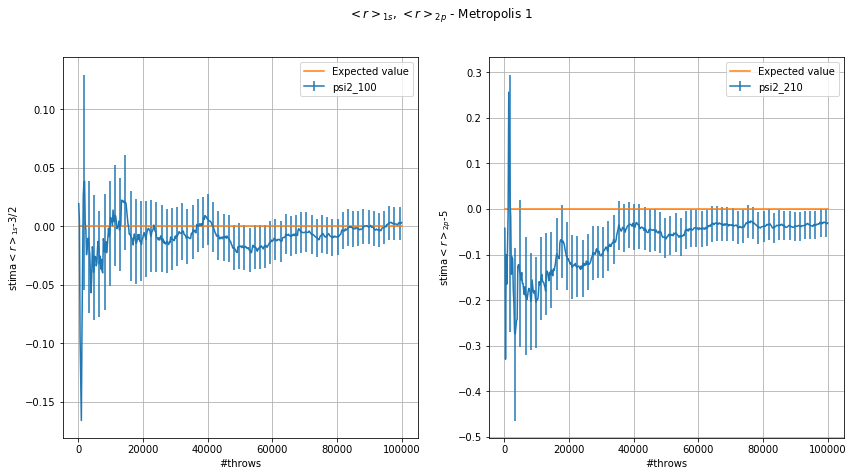

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D


#METROPOLIS 1

Nthrows, r100, err100 = np.loadtxt("psi2_100.dat", usecols=(0,1,2), unpack=True)
Nthrows, r210, err210 = np.loadtxt("psi2_210.dat", usecols=(0,1,2), unpack=True)

plt.figure(figsize=(14,7))

a = np.zeros(len(Nthrows))
#100
plt.subplot(1,2,1)
plt.errorbar(Nthrows ,r100-1.5, yerr=err100,label='psi2_100',errorevery=8)
plt.plot(Nthrows, a, label='Expected value')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('stima$<r>_{1s}$-3/2')

#210

plt.subplot(1,2,2)
plt.errorbar(Nthrows ,r210-5, yerr=err210,label='psi2_210',errorevery=8)
plt.plot(Nthrows, a, label='Expected value')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('stima$<r>_{2p}$-5')


plt.suptitle('$<r>_{1s}$, $<r>_{2p}$ - Metropolis 1')
plt.show()

Osserviamo che c'è accordo tra i valori teorici e le stime Montecarlo. 


Di seguito sono raffigurati degli scatterplot di 500 punti dei campioni di $|\psi _{100}|^2$ e $|\psi _{210}|^2$

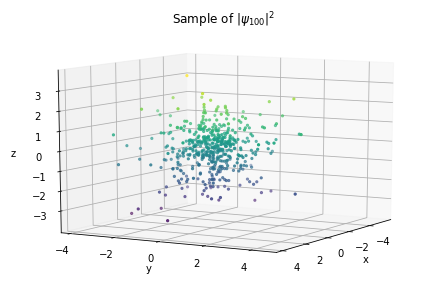

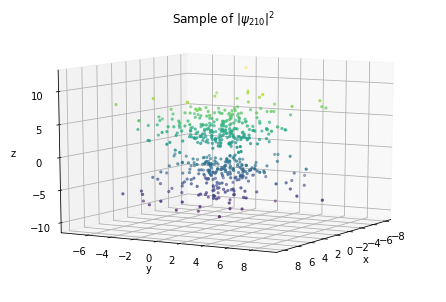

In [16]:
#SCATTERPLOT


x,y,z = np.loadtxt("points_100.dat", usecols=(0,1,2), unpack = 'True' )

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title('Sample of $|\psi _{100}|^2$')
plt.show()


x,y,z = np.loadtxt("points_210.dat", usecols=(0,1,2), unpack = 'True' )

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title('Sample of $|\psi _{210}|^2$')
plt.show()




### Sampling con probabilità di tansizione normale multivariata

Infine è stata fatta un'ulteriore stima degli integrali $<r>_{1s}$ e $<r>_{2s}$ utilizzando un algoritmo Metropolis che genera i punti proposti in modo differente: dato il punto  $\mathbf{x}_{i}$ viene proposto  $\mathbf{x}_{i+1}= \mathbf{x}_{i}+\mathbf{w}$ con $\mathbf{w}\sim \mathcal{N}(0,\delta \mathbb{I}_3)$.
Anche in questo caso otteniamo delle buone stime Monte Carlo:

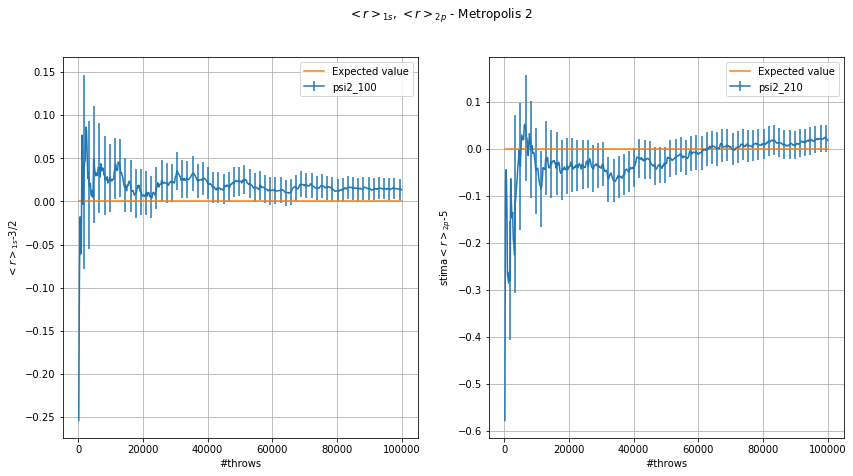

In [18]:
#METROPOLIS 2

plt.figure(figsize=(14,7))

Nthrows, r100, err100 = np.loadtxt("psi2_100_gauss.dat", usecols=(0,1,2), unpack=True)
Nthrows, r210, err210 = np.loadtxt("psi2_210_gauss.dat", usecols=(0,1,2), unpack=True)

#100

plt.subplot(1,2,1)
plt.errorbar(Nthrows ,r100-1.5, yerr=err100,label='psi2_100',errorevery=8)
plt.plot(Nthrows, a, label='Expected value')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('$<r>_{1s}$-3/2')

#210

plt.subplot(1,2,2)
plt.errorbar(Nthrows ,r210-5, yerr=err210,label='psi2_210',errorevery=8)
plt.plot(Nthrows, a, label='Expected value')
plt.legend()
plt.grid(True)
plt.xlabel('#throws')
plt.ylabel('stima$<r>_{2p}$-5')


plt.suptitle('$<r>_{1s}$, $<r>_{2p}$ - Metropolis 2')
plt.show()

